In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
df_adult = pd.read_csv(r'C:\Users\hp\OneDrive\Рабочий стол\Netology AB\Лекция_2\adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
lst = list(df_adult.columns)

# Доход перемещается влево для удобства
new_col = [lst[-1]]+lst[:-1]
df_adult = df_adult[new_col]

df_adult.head()

,income,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,<=50K,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,<=50K,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,>50K,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,>50K,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,<=50K,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [4]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           48842 non-null  object
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_adult.age.dtype

dtype('int64')

In [6]:
# Столбцы группируются по типам на счётные и несчётные, т.к. их по-разному отображает describe()
list_int =    [i for i 
                in df_adult 
                if df_adult[i].dtype == 'int64']

list_noint =    [i for i 
                in df_adult 
                if df_adult[i].dtype != 'int64']

list_int, list_noint

(['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['income',
  'workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country'])

In [7]:
display(df_adult[list_int].describe())
display(df_adult[list_noint].describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,2,9,16,7,15,6,5,2,42
top,<=50K,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,37155,33906,15784,22379,6172,19716,41762,32650,43832


In [8]:
for col in df_adult[list_int+list_noint]:
    print(col)
    print(df_adult[col].unique())

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
fnlwgt
[226802  89814 336951 ... 129912 255835 257302]
educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
capital-gain
[    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5

In [9]:
#В датасете пропуском является "?", поэтому определяются столбцы, в которых этот знак встречается
null_cols = pd.DataFrame(
    pd.DataFrame(df_adult == '?').astype('int').sum()).reset_index().rename(
    columns={
        0:'totl',
        'index':'col'
    }).query('totl != 0')

null_cols

,col,totl
2,workclass,2799
7,occupation,2809
14,native-country,857


In [10]:
for col in null_cols.col:
    display(
        df_adult[df_adult[col] == '?']
    )

,income,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4,<=50K,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
6,<=50K,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
13,<=50K,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States
22,<=50K,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States
35,<=50K,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,>50K,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States
48812,<=50K,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States
48820,>50K,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States
48822,<=50K,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States


,income,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4,<=50K,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
6,<=50K,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
13,<=50K,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States
22,<=50K,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States
35,<=50K,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,>50K,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States
48812,<=50K,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States
48820,>50K,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States
48822,<=50K,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States


,income,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
19,>50K,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?
65,<=50K,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?
83,>50K,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?
188,<=50K,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?
253,<=50K,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,>50K,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?
48750,<=50K,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?
48773,<=50K,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?
48791,>50K,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?


In [11]:
#Подсчёт доли пропусков для решения об их удалении
for col in null_cols.col:
    ds_t = df_adult.groupby(col)[['income']].count().sort_values(
        by='income', ascending=False
    )
    
    ds_t['rate'] = ds_t['income'] / ds_t['income'].sum()
    
    display(
        ds_t
    )

,income,rate
workclass,,
Private,33906,0.694198
Self-emp-not-inc,3862,0.079071
Local-gov,3136,0.064207
?,2799,0.057307
State-gov,1981,0.040559
Self-emp-inc,1695,0.034704
Federal-gov,1432,0.029319
Without-pay,21,0.000430
Never-worked,10,0.000205


,income,rate
occupation,,
Prof-specialty,6172,0.126367
Craft-repair,6112,0.125138
Exec-managerial,6086,0.124606
Adm-clerical,5611,0.114881
Sales,5504,0.112690
Other-service,4923,0.100794
Machine-op-inspct,3022,0.061873
?,2809,0.057512
Transport-moving,2355,0.048217


,income,rate
native-country,,
United-States,43832,0.897424
Mexico,951,0.019471
?,857,0.017546
Philippines,295,0.006040
Germany,206,0.004218
Puerto-Rico,184,0.003767
Canada,182,0.003726
El-Salvador,155,0.003173
India,151,0.003092


In [12]:
for col in null_cols.col:
    indx = list(df_adult[df_adult[col] == '?'].index)
    df_adult = df_adult.drop(index=indx)
    
    print(df_adult[df_adult[col] == '?'])

Empty DataFrame
Columns: [income, age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country]
Index: []
Empty DataFrame
Columns: [income, age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country]
Index: []
Empty DataFrame
Columns: [income, age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country]
Index: []


In [13]:
print( f'Для удаления пропусков удалено {(1 - df_adult.shape[0] / 48842):.2%} данных')

Для удаления пропусков удалено 7.41% данных


* Пустые значения можно распределить пропорционально распределению по распределению известных значений 
(соответственно, workclass, occupation и native-country), аналогичных по известным характеристикам.
Главное, чтобы "группа размазывания" была достаточной, чтобы доля "примеси" составляла до 5%, а ещё лучше - до 2%.

In [14]:
df_set = df_adult.groupby(
    by=['income','gender']
)[
    ['age', 'capital-gain', 'capital-loss','hours-per-week']
].mean().reset_index()

df_set

,income,gender,age,capital-gain,capital-loss,hours-per-week
0,<=50K,Female,36.337479,124.088055,46.032474,36.391678
1,<=50K,Male,37.005098,164.499285,58.997522,41.221746
2,>50K,Female,42.036549,4209.846016,182.043739,41.156980
3,>50K,Male,44.350666,3953.639585,195.489255,46.483699


age


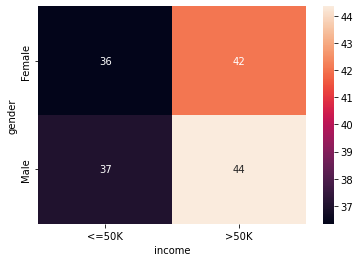

capital-gain


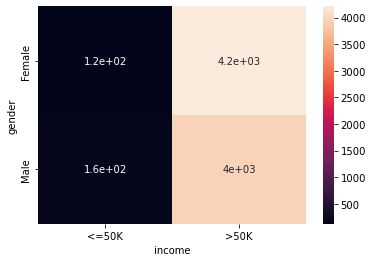

capital-loss


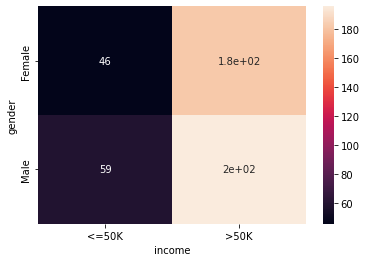

hours-per-week


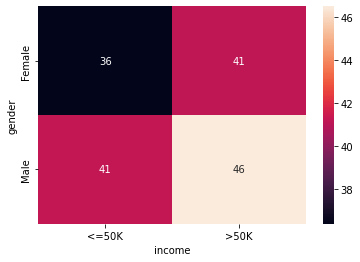

In [15]:
# Различие средних показателей по доходу и гендеру (говорит о неоднородности)
# Конечно, выводы лучше подкрепить t-тестом
for col in list(df_set.columns)[2:]:
    print(col)
    sns.heatmap(
        df_set.pivot_table(
            columns='income', 
            index='gender', 
            values=col), 
        annot=True
    );
    plt.show();

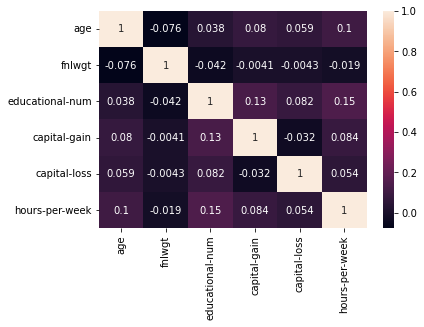

In [16]:
#Показатели слабо коррелированы - нигде не набирается даже 40%.
sns.heatmap(
        df_adult.corr(), 
        annot=True
    );

Преобразуйте категориальные признаки.

In [17]:
lst = list(df_adult.income.unique())

income_ch = pd.DataFrame(enumerate(lst)).set_index(1)

lst = list(df_adult.gender.unique())

gender_ch = pd.DataFrame(enumerate(lst)).set_index(1)

income_ch

,0
1,
<=50K,0
>50K,1


In [18]:
df_adlt_num = df_adult.copy()

# Для полей с 2мя значениями распределение на 1-0
df_adlt_num['income'] = df_adlt_num['income'].apply(lambda x: income_ch.loc[x][0])
df_adlt_num['gender'] = df_adlt_num['gender'].apply(lambda x: gender_ch.loc[x][0])

# Для полей с множеством значений каждому значению поля - параметр 1-0
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']:
    for val in list(df_adult[col].unique()):
        df_adlt_num[f'{col}_{val}'] = df_adlt_num[f'{col}'].apply(lambda x: 1 if x==f'{val}' else 0)
        
lst = ['income', 'age', 'fnlwgt', 
 'educational-num', 'gender', 
 'capital-gain', 'capital-loss', 
 'hours-per-week']+list(df_adlt_num.columns)[15:]

df_adlt_test = df_adlt_num[lst]

df_adlt_test.head(10)

,income,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Local-gov,...,native-country_Jamaica,native-country_Ecuador,native-country_Yugoslavia,native-country_Hungary,native-country_Hong,native-country_Greece,native-country_Trinadad&Tobago,native-country_Outlying-US(Guam-USVI-etc),native-country_France,native-country_Holand-Netherlands
0,0,25,226802,7,0,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38,89814,9,0,0,0,50,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,336951,12,0,0,0,40,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,44,160323,10,0,7688,0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,34,198693,6,0,0,0,30,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,27,257302,12,1,0,0,38,1,0,...,0,0,0,0,0,0,0,0,0,0
48838,1,40,154374,9,0,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
48839,0,58,151910,9,1,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
48840,0,22,201490,9,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Перед сплитованием выборка разбивается на 9 групп для равномерного разделения на тест и выборку
df_adlt_test['grp'] = df_adlt_test.apply(
    lambda x: str(
        x['income']
    )+str(
        x['gender']
    )+str(
        x['native-country_United-States'] #Признак США-неСША выбран, потому что среди стран большинство из этой страны.
    )
    , axis=1
)

df_adlt_test

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,income,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Local-gov,...,native-country_Ecuador,native-country_Yugoslavia,native-country_Hungary,native-country_Hong,native-country_Greece,native-country_Trinadad&Tobago,native-country_Outlying-US(Guam-USVI-etc),native-country_France,native-country_Holand-Netherlands,grp
0,0,25,226802,7,0,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,001
1,0,38,89814,9,0,0,0,50,1,0,...,0,0,0,0,0,0,0,0,0,001
2,1,28,336951,12,0,0,0,40,0,1,...,0,0,0,0,0,0,0,0,0,101
3,1,44,160323,10,0,7688,0,40,1,0,...,0,0,0,0,0,0,0,0,0,101
5,0,34,198693,6,0,0,0,30,1,0,...,0,0,0,0,0,0,0,0,0,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,27,257302,12,1,0,0,38,1,0,...,0,0,0,0,0,0,0,0,0,011
48838,1,40,154374,9,0,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,101
48839,0,58,151910,9,1,0,0,40,1,0,...,0,0,0,0,0,0,0,0,0,011
48840,0,22,201490,9,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,001


In [21]:
group_list = list(df_adlt_test.grp.unique())

group_list

['001', '101', '011', '000', '111', '100', '010', '110']

In [22]:
X_train=pd.DataFrame()
X_test=pd.DataFrame()
y_train=pd.DataFrame()
y_test=pd.DataFrame()

#
for group_i in group_list:
    print(f'grp == "{group_i}"')
    ds_i = df_adlt_test.query(f'grp == "{group_i}"')
    
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    ds_i.iloc[:,1:-1], ds_i.iloc[:,0:1],
    test_size=0.2, random_state=42
)
    
    X_train=X_train.append(X_train_i)
    X_test=X_test.append(X_test_i)    
    y_train=y_train.append(y_train_i)    
    y_test=y_test.append(y_test_i)    

grp == "001"
grp == "101"
grp == "011"
grp == "000"
grp == "111"
grp == "100"
grp == "010"
grp == "110"


In [23]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f'Точность линейной модели - {reg.score(X_test, y_test):.2%}')

Точность линейной модели - 36.29%


In [26]:
reg = LogisticRegression(solver='liblinear', random_state=0)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
f'Точность логистической модели - {reg.score(X_test, y_test):.2%}'

'Точность логистической модели - 79.10%'

In [28]:
conf = confusion_matrix(y_test, y_pred)

conf

array([[6558,  246],
       [1645,  597]], dtype=int64)

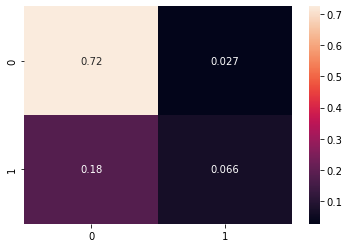

In [29]:
sns.heatmap(conf / conf.sum(), annot=True);

In [30]:
clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
f'Точность модели опорных векторов - {clf.score(X_test, y_test):.2%}'

'Точность модели опорных векторов - 79.00%'

Данные были загружены, 

удалены строки, содержащие пропуски в 3х полях - это допустимая потеря, близкая к 5%.

Категорийные значения были преобразованы - бинарные - просто в 1-0, а для многозначных - каждому полю назначено значение.

Затем для лучшей однородности по 3м важнейшим значениям - доходу, гендеру и стране США-не-США произведён сплит с выделением 20%й тестовой выборки.

Затем предсказан доход по 3м моделям - линейной, логистической и опорных векторов

Обе модели показали точность 79-80%, что в 2 раза точнее линейной модели.

Обе модели справились с задачей, но возможно также попробовать улучшить точность до 90%

Для этого можно попробовать разные параметры моделей

или попробовать добавить удалённые данные с пропусками в обучающую или тестовые выборки.